# Part I - Exploration of Prosper Laon Dataset
## by Yuta Sekiguchi

## Introduction

We analyze the dataset from Prosper, which consists of the information on 113937 loans with 81 variables, including the loan amount, the period of loans, the borrowers' data and so on. The dataset can be found [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554484977406000). The variable definitios are available [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000).

## 1. Preliminary Wrangling

In [2]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Load the CSV file and see the first 5 rows
prosper_loan = pd.read_csv('prosperLoanData.csv')
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Check the shape of the dataset
prosper_loan.shape

(113937, 81)

In [5]:
# Check the datatype and number of non-trivial values in each column
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Count the number of data types
prosper_loan.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

In [7]:
# Overview the number of null values in each column
with pd.option_context('display.max_rows', None):
  display(prosper_loan.isnull().sum())

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

### What is the structure of your dataset?

- The dataset includes 113937 rows (observations) and 81 columns. 50 attributes are defined as `float`, 17 as `object`, 11 as `int`, and 3 as `bool`.

### What is/are the main feature(s) of interest in your dataset?

- The dataset deals with the information for loans and borrowers. It is interesting to understand the correlation between the loan amount, the personal details of borrowers, and the **annual percentage rate**s (**APR**s). In particular, we regard the APR as an important quantity. On one side, Prosper should properly fix the APR in order to get returns as efficiently as possible and on the other side the borrowers should efficiently repay the loans with a proper value of APR to keep the reliability. So our main question is whether the APR depends on how much the loan amounts to, how much the borrower's rating scores are, etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
To investigate the relationships of APRs with other features, we adopt the following variables:
- Basic information on loans, including the length of loan period (`Term`), `LoanOriginalAmount`, `LoanStatus`, `ListingCategory (numeric)`, and `DebtToIncomeRatio`
- Personal information of borrowers, such as `StatedMonthlyIncome`, `Occupation`s and `EmploymentStatus`.
- Quantities indicating reliability and risks, such as `ProsperRating (Alpha)`, `ProsperScore`, and `IncomeVerifiable`.

#### Feature selection

- We now single out the relevant features from the dataset.

In [8]:
# Select interesting columns
cols_sub = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'Occupation', 'ListingCategory (numeric)','StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)', 'ProsperScore']

# Take a subset of the dataset
loan_df_sub = prosper_loan[cols_sub]

## 2. Univariate Exploration

In this section, we investigate the distribution and statistics for each variable.

### 2.1. BorrowerAPR

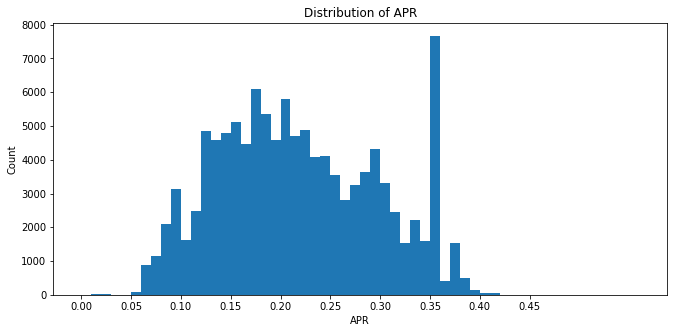

In [9]:
# Configure the histogram
plt.figure(figsize=(11, 5))
bins = np.arange(0, loan_df_sub.BorrowerAPR.max() + 0.05, 0.01)
plt.hist(data = loan_df_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('APR')
plt.ylabel('Count')
xtick = np.arange(0, 50, 5) / 100
plt.xticks(xtick)
plt.title('Distribution of APR');

In [10]:
# Check the maximum
loan_df_sub.BorrowerAPR.max()

0.5122899999999999

In [11]:
# Overview the counts
loan_df_sub.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.22825       1
0.22955       1
0.24844       1
0.30775       1
0.11833       1
Name: BorrowerAPR, Length: 6677, dtype: int64

In [12]:
# Inspect the threshold, above which the counts drop.
loan_df_sub[loan_df_sub.BorrowerAPR > 0.41].sort_values(by='BorrowerAPR', ascending=False)

,LoanStatus,BorrowerAPR,EmploymentStatus,Occupation,ListingCategory (numeric),StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),ProsperScore
36018,Completed,0.51229,NaN,NaN,0,2838.000000,True,0.02852,1500,36,NaN,NaN
56761,Defaulted,0.50633,NaN,NaN,0,0.000000,False,0.03909,3000,36,NaN,NaN
82043,Defaulted,0.48873,NaN,NaN,0,1583.333333,True,0.10021,3000,36,NaN,NaN
22195,Chargedoff,0.46201,NaN,NaN,0,2916.666667,True,0.35430,1789,36,NaN,NaN
103973,Defaulted,0.45857,NaN,NaN,0,3750.000000,True,0.19413,2800,36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46051,Defaulted,0.41355,Full-time,Professional,1,9166.666667,True,0.08000,1000,36,NaN,NaN
46633,Completed,0.41355,Full-time,Accountant/CPA,1,4375.000000,True,0.16000,1000,36,NaN,NaN
47754,Completed,0.41355,Self-employed,Homemaker,7,6800.000000,False,NaN,1000,36,HR,4.0
48568,Completed,0.41355,Retired,Other,7,3000.000000,False,NaN,1000,36,HR,4.0


In [13]:
# Inspect the threshold
display(loan_df_sub[loan_df_sub.BorrowerAPR > 0.42].sort_values(by='BorrowerAPR', ascending=False))

,LoanStatus,BorrowerAPR,EmploymentStatus,Occupation,ListingCategory (numeric),StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),ProsperScore
36018,Completed,0.51229,NaN,NaN,0,2838.000000,True,0.02852,1500,36,NaN,NaN
56761,Defaulted,0.50633,NaN,NaN,0,0.000000,False,0.03909,3000,36,NaN,NaN
82043,Defaulted,0.48873,NaN,NaN,0,1583.333333,True,0.10021,3000,36,NaN,NaN
22195,Chargedoff,0.46201,NaN,NaN,0,2916.666667,True,0.35430,1789,36,NaN,NaN
18326,Defaulted,0.45857,NaN,NaN,0,10000.000000,True,0.10252,3000,36,NaN,NaN
103973,Defaulted,0.45857,NaN,NaN,0,3750.000000,True,0.19413,2800,36,NaN,NaN
105889,Chargedoff,0.42395,Employed,Administrative Assistant,7,2250.000000,True,0.08000,1000,36,HR,4.0


- The distribution is approximately a bell shape whose peak sits around `0.17`, except for that the distribution has a little spike around `0.28` and a sharp peak around `0.35`.
- The value `0.42` of `BorrowerAPR` is a certain threshold, above which the count number drops to 7 cases. However, there is no unique visible outlier that would stand out.

### 2.2 StatedMonthlyIncome

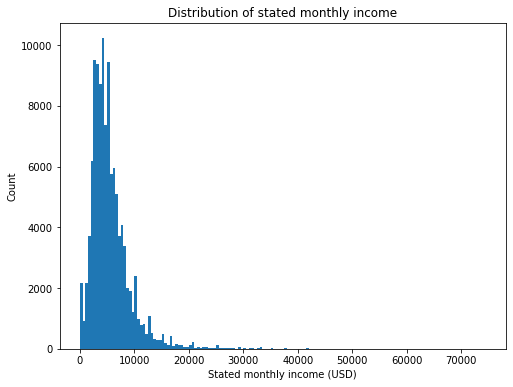

In [14]:
# Create the histgram
plt.figure(figsize=(8,6))
income_bins = np.arange(0, 750, 5) * 100
plt.hist(data = loan_df_sub, x='StatedMonthlyIncome', bins = income_bins);
plt.xlabel('Stated monthly income (USD)')
plt.ylabel('Count')
plt.title('Distribution of stated monthly income');

- Since the distribution looks right-skewed, we also present the dstribution on the log scale.

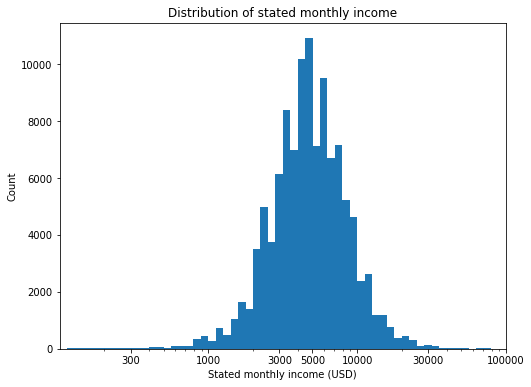

In [16]:
plt.figure(figsize=(8, 6))
bins = 10 ** np.arange(-1, 6, 0.05)
ticks = [300, 1000, 3000, 5000, 10000, 30000, 100000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = loan_df_sub, x='StatedMonthlyIncome', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim((100, 100000))
plt.xlabel('Stated monthly income (USD)')
plt.ylabel('Count')
plt.title('Distribution of stated monthly income');

- The plot on the log scale clearly turns the skewed curve into a bell shape, where the peak stands out around `50K` USD.

In [17]:
loan_df_sub.sort_values(by='StatedMonthlyIncome', ascending=False)

,LoanStatus,BorrowerAPR,EmploymentStatus,Occupation,ListingCategory (numeric),StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),ProsperScore
53167,Current,0.35797,Self-employed,Professional,3,1.750003e+06,False,NaN,4000,36,HR,4.0
53014,Completed,0.25785,Self-employed,Other,3,6.185478e+05,False,NaN,4000,12,D,3.0
17411,Completed,0.35643,Employed,Professional,1,4.833333e+05,True,0.0,7500,36,E,5.0
57133,Current,0.35643,Employed,Other,2,4.666667e+05,True,0.0,4000,36,E,5.0
8066,Completed,0.35643,Employed,Police Officer/Correction Officer,1,4.166667e+05,True,0.0,2000,36,HR,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20122,Current,0.21372,Not employed,Other,7,0.000000e+00,False,NaN,8500,36,B,8.0
100136,Defaulted,0.16968,NaN,NaN,0,0.000000e+00,False,NaN,3000,36,NaN,NaN
28174,Completed,0.17677,Not employed,Other,7,0.000000e+00,True,NaN,1000,36,NaN,NaN
96448,Completed,0.31368,Not employed,Other,1,0.000000e+00,False,NaN,4000,12,E,6.0


- As shown in the above result, the first row takes `1.75e+06` in `StatedMonthlyIncome`, which is about **2.8** times large as the second row (`6.185478e+05`). This would not be an exceptional case, an outlier. 

### 2.3. Loan Status

In [18]:
# Check the value counts
loan_df_sub.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

- Compared to the values related to `Past Due`, the major proportions are occupied by `Current`, `Completed,`, `Chargedoff`, and `Defaulted`. 
- We might want to set the values determined as `Past Due` to be in one category.

In [19]:
# Combine all the values for past due into one category
past_due = ['Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'Past Due (>120 days)']

for i in range(len(loan_df_sub)):
    if loan_df_sub.loc[i, "LoanStatus"] in past_due:
        loan_df_sub.loc[i, "LoanStatus"] = "Past Due"

loan_df_sub.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

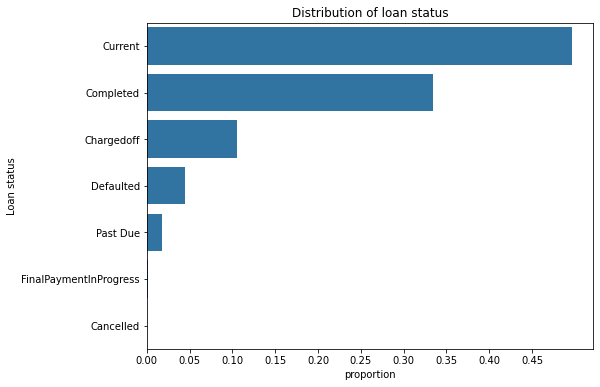

In [21]:
# Make the same bar plot w.r.t. proportions
# Compute the value counts and order
status_counts = loan_df_sub.LoanStatus.value_counts()
status_order = status_counts.index

# Compute largest proportion
# Returns the sum of all not-null values in `LoanStatus` column
n_status = loan_df_sub.LoanStatus.value_counts().sum()
max_status_count = status_counts[0]
max_prop = max_status_count / n_status

# Create tick locations and create plot
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sb.color_palette()[0]
plt.figure(figsize=(8, 6))
sb.countplot(data = loan_df_sub, y = 'LoanStatus', color = base_color, order = status_order)
plt.xticks(tick_props * n_status, tick_names)
plt.title('Distribution of loan status')
plt.xlabel('proportion')
plt.ylabel('Loan status');

- Almost a half of loans are `Current`, `33%` are `Completed`, and `11%` are `Chargedoff`. About `5%` of loans were `Defaulted`, and only `2%` are `Past Due`.

### 2.4 IncomeVerifiable

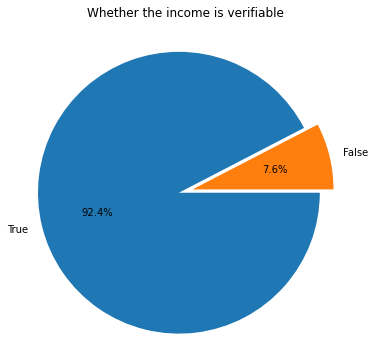

In [22]:
# We adopt the pie chart, since this variable takes only two values
plt.figure(figsize=(8, 6))
verify_counts = loan_df_sub['IncomeVerifiable'].value_counts(normalize=True)
plt.pie(verify_counts, labels = verify_counts.index, counterclock=False, autopct='%1.1f%%', explode=(0,0.1))
plt.axis('square')
plt.title('Whether the income is verifiable');

- The pie chart shows that the incomes of over `92%` of borrowers are `verifiable`.

### 2.5 Employment Status

In [23]:
# Check the value counts
employ_count = loan_df_sub['EmploymentStatus'].value_counts()
employ_count

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

- As shown above, we see that the majority of the employment status is occupied by those who are either employed or self-employed, though it is not clear how `Employed`, `Not available`, and `Other` are defined.

In [24]:
# Custom function for a normalized horizontal bar plot
def proportion_horizontal_plot(data, y, color):
    counts = data[y].value_counts()
    order = counts.index
    # Compute largest proportion
    # Returns the sum of all not-null values in `LoanStatus` column
    n_largest = counts.sum()
    max_count = counts[0]
    max_prop = max_count / n_largest

    # Create tick locations and create plot
    tick_props = np.arange(0, max_prop, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    base_color = sb.color_palette()[0]
    sb.countplot(data = data, y = y, color = color, order = order)
    plt.xticks(tick_props * n_largest, tick_names)
    plt.xlabel('proportion');

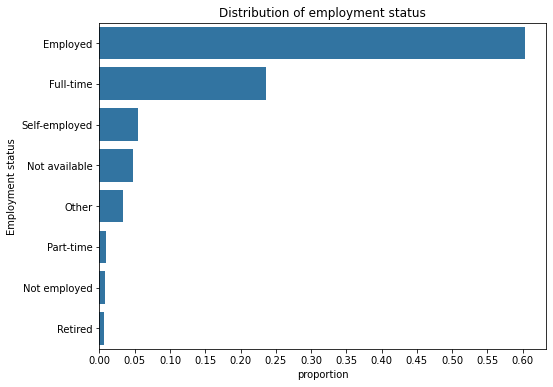

In [25]:
# Plot the proportion of Employment status
plt.figure(figsize=(8, 6))
proportion_horizontal_plot(loan_df_sub, "EmploymentStatus", base_color)
plt.ylabel('Employment status')
plt.title('Distribution of employment status');

- As shown in the above plot, more than `60%` employee with contracts take loans. The second largest proportion is shared by `Full-time`, being those who have contracts with companies.

### 2.6 Occupation

In [26]:
# Count values
loan_df_sub.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

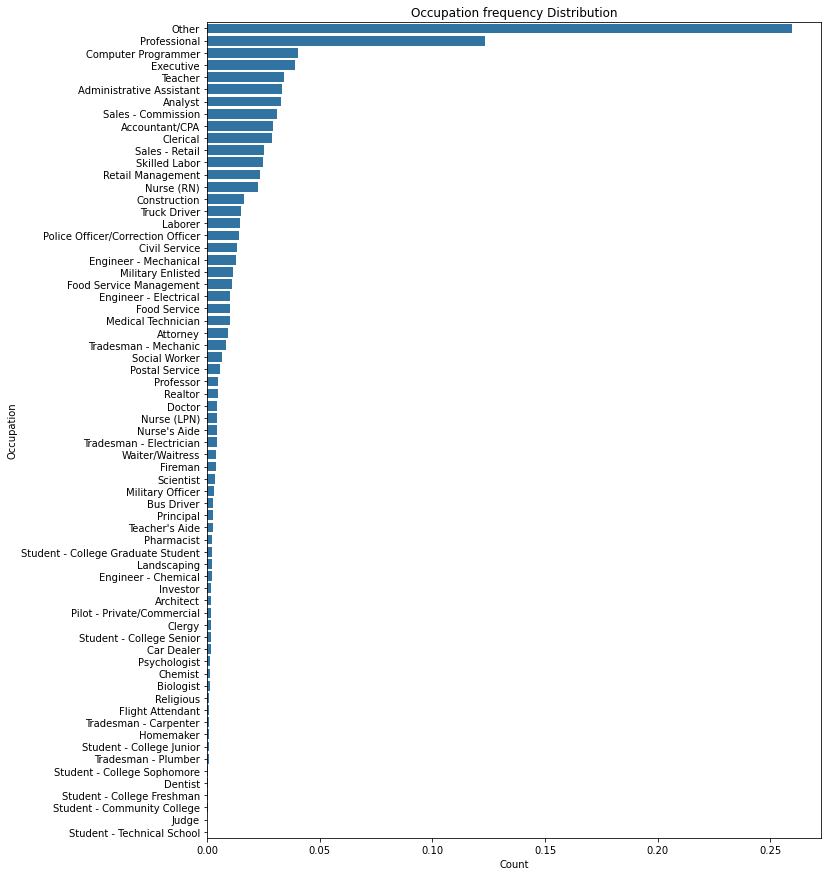

In [28]:
# Plot the whole ranking of occupations
plt.figure(figsize=[11,15]);
proportion_horizontal_plot(loan_df_sub, 'Occupation', base_color)
plt.title('Occupation frequency Distribution');
plt.xlabel('Count');
plt.ylabel('Occupation');

- `Other` and `Professional` are the first and second largest occupations. Below we restrict to specific jobs and list top 10 jobs of borrowers.

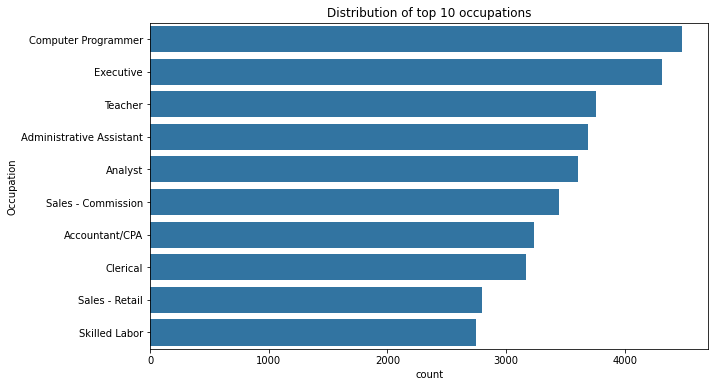

In [30]:
# Truncate to the top 10 ranking
top_ten_occup = loan_df_sub.Occupation.value_counts()[2:10+2]
top_ten_occup = top_ten_occup.reset_index()
top_ten_occup.columns = ['Occupation', 'count']
plt.figure(figsize=(10, 6))
sb.barplot(data=top_ten_occup, x='count', y='Occupation', color=base_color)
plt.title('Distribution of top 10 occupations');
plt.xlabel('count');
plt.ylabel('Occupation');

- Among top 10 occupations, `Computer Programmer` is the largest, while `Executive` is the second largest. 

### 2.7 Listing category

- For this column, we map numeric values in the data set into categorical values according to the variable definition. 

In [31]:
# Create a dictionary to map numerical values into categorical values.
list_cat = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
            5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption',9:'Boat', 10 :'Cosmetic Procedure',
            11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases',
            15:'Medical/Dental', 16:'Motorcycle',17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

loan_df_sub['ListingCategory'] = loan_df_sub['ListingCategory (numeric)'].map(list_cat)
loan_df_sub.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [32]:
# Overview of the distribution of listing categories
loan_df_sub.ListingCategory.value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

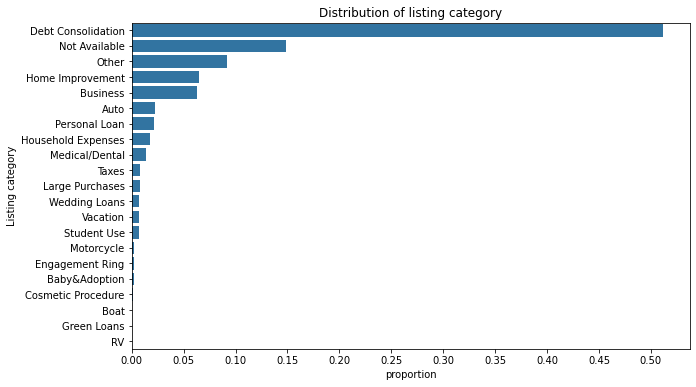

In [33]:
plt.figure(figsize=(10, 6))
proportion_horizontal_plot(loan_df_sub, "ListingCategory", base_color)
plt.ylabel('Listing category')
plt.title('Distribution of listing category');

- Though 25% of rows have `Not Available` and `Other` in total, it is shown that about `50%` was occupied by `Debt Consolidation`, which should be the primary reason for taking loans. 
- `Home Improvement` and `Business` occupy 6%, respectively. 
- Each of the other loan purposes, such as `Auto` and `Household` is less than 5%.
- Around 1% of borrowers dare to take loans to spend vacations.

### 2.8 Term

In [34]:
# Count values
term_counts = loan_df_sub.Term.value_counts()
term_counts

36    87778
60    24545
12     1614
Name: Term, dtype: int64

- Three values in the column `Term` are the lengths of loan periods, and thus can be considered as categorical variables. Still, since there are not many vaues, we just plot them in the donut plot.

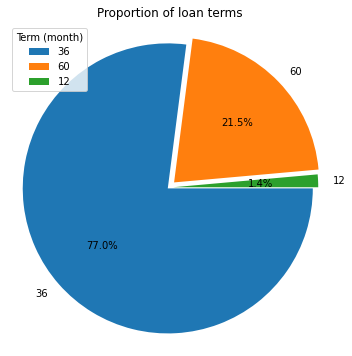

In [35]:
# Plot the proportion of loan terms
plt.figure(figsize=(8, 6))
plt.pie(term_counts, labels = term_counts.index, counterclock=False, autopct='%1.1f%%', explode=(0.01,0.05,0.03))
plt.axis('square')
plt.title('Proportion of loan terms')
plt.legend(term_counts.index, title='Term (month)');

- The pie chart tells us that `77%` of borrowers set the loan period to be `36` months, `21.5%` choose `60` months. Only `1.4%` of borrowers take `12` months.

### 2.9 LoanOriginalAmount


In [36]:
# Overview the stats of the original amount of loans
loan_df_sub.LoanOriginalAmount.describe()


count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

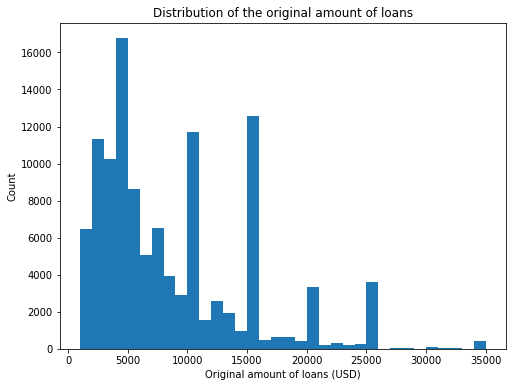

In [37]:
# Plot the histogram
plt.figure(figsize=(8, 6))
bins = np.arange(1000, loan_df_sub.LoanOriginalAmount.max()+100, 1000)
plt.hist(data = loan_df_sub, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original amount of loans (USD)')
plt.ylabel('Count')
plt.title('Distribution of the original amount of loans');

- We find 6 spikes around `5K`, `10K`, `15K`, `20K`, `25K`, and `35K`. Apart from them, the distribution could look right-skewed.

### 2.10 DebtToIncomeRatio

In [38]:
# Overview of the statistics of DebtToIncomeRatio
loan_df_sub.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

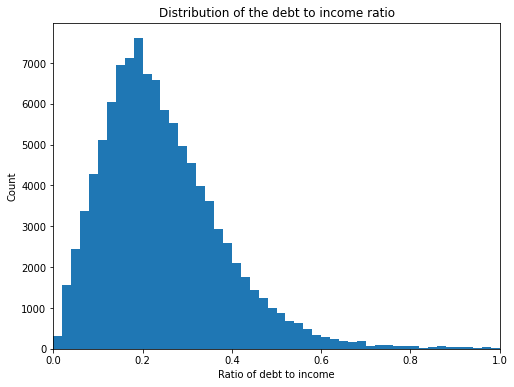

In [40]:
# Plot the histogram
plt.figure(figsize=(8, 6))
bins = np.arange(loan_df_sub.DebtToIncomeRatio.min(), loan_df_sub.DebtToIncomeRatio.max()+0.01,0.02)
plt.hist(data = loan_df_sub, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Ratio of debt to income')
plt.ylabel('Count')
plt.xlim((0, 1))
plt.title('Distribution of the debt to income ratio');

- The distribution of the debt to income ratio of borrowers looks right-skewed. The shape of the plot has a peak around `0.2`.

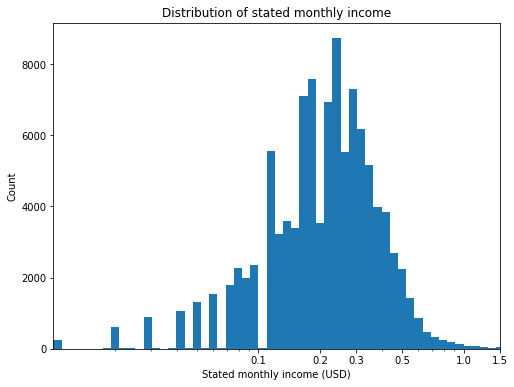

In [41]:
# Plot in the log scale
plt.figure(figsize=(8, 6))
bins = 10 ** np.arange(-2, 0.5, 0.04)
ticks = [0, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = loan_df_sub, x='DebtToIncomeRatio', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim((0, 1.5))
plt.xlabel('Stated monthly income (USD)')
plt.ylabel('Count')
plt.title('Distribution of stated monthly income');

- Note that the right-skewed shape has some spikes and drops by adjusting the widths of bins as follows:

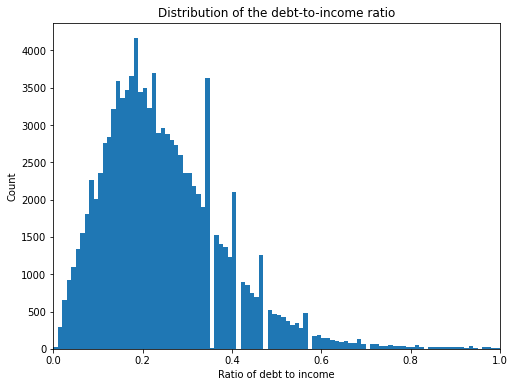

In [43]:
# Plot the histogram with narrower bins
plt.figure(figsize=(8, 6))
bins = np.arange(loan_df_sub.DebtToIncomeRatio.min(), loan_df_sub.DebtToIncomeRatio.max()+0.01,0.01)
plt.hist(data = loan_df_sub, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Ratio of debt to income')
plt.ylabel('Count')
plt.xlim((0, 1))
plt.title('Distribution of the debt-to-income ratio');

- The spikes are found around `0.35`, `0.41`, `0.45`, `0.56`. There are sudden drops right to these spikes. The drops will be filled by making the bin width wider as shown above.

### 2.11 ProsperRating (Alpha)

In [44]:
# Count the values
alpha_counts = loan_df_sub['ProsperRating (Alpha)'].value_counts()
alpha_counts

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

- Let us set the rating symbols to be categorical variables below.

In [45]:
# We assume that the best rating should be on the left.
alpha_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
alpha_rule = pd.api.types.CategoricalDtype(categories=alpha_order, ordered=True)
loan_df_sub['ProsperRating (Alpha)'] = loan_df_sub['ProsperRating (Alpha)'].astype(alpha_rule)
loan_df_sub.dtypes

LoanStatus                 object
BorrowerAPR               float64
EmploymentStatus           object
Occupation                 object
StatedMonthlyIncome       float64
IncomeVerifiable             bool
DebtToIncomeRatio         float64
LoanOriginalAmount          int64
Term                        int64
ProsperRating (Alpha)    category
ProsperScore              float64
ListingCategory            object
dtype: object

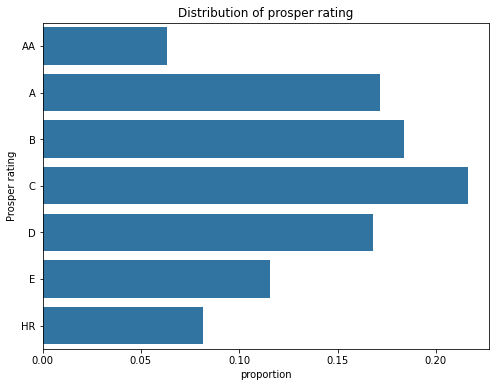

In [48]:
# Compute largest proportion
# Returns the sum of all not-null values in `LoanStatus` column
sum_count = alpha_counts.sum()
max_count = alpha_counts.max()
max_prop = max_count / sum_count

# Create tick locations and create plot
plt.figure(figsize=(8, 6))
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df_sub, y = 'ProsperRating (Alpha)', color = base_color, order=alpha_order)
plt.xticks(tick_props * sum_count, tick_names)
plt.xlabel('proportion')
plt.ylabel('Prosper rating')
plt.title('Distribution of prosper rating');

- The best rarting score `AA` shares the smallest proportion (about `6%`) whereas `A`, `B`, `C`, and `D` have a value larger than `15%`, respectively. The largest portion was shared by `C` (`22%`), which should be the standard rating. Still, if we sum up the contributions of both `A` and `AA`, its value will be the largest.
For the rest, `E` amounts to around `11%`, and the lowest `HR` takes `8%`.

### 2.12 ProsperScore

In [49]:
# Overview of the distribution
risk_counts = loan_df_sub.ProsperScore.value_counts()
risk_counts

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

- According to the variable definition, the value `10.0` is defined as the best, i.e. the lowest risk. However, we find `11.0`. We cannot resolve this inconsistency by ourselves. Thus, this time around, we regard `11.0` as being the best.

In [50]:
# We assume that the best rating should be on the left.
risk_order = [11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
risk_rule = pd.api.types.CategoricalDtype(categories=risk_order, ordered=True)
loan_df_sub['ProsperScore'] = loan_df_sub['ProsperScore'].astype(risk_rule)
loan_df_sub.dtypes

LoanStatus                 object
BorrowerAPR               float64
EmploymentStatus           object
Occupation                 object
StatedMonthlyIncome       float64
IncomeVerifiable             bool
DebtToIncomeRatio         float64
LoanOriginalAmount          int64
Term                        int64
ProsperRating (Alpha)    category
ProsperScore             category
ListingCategory            object
dtype: object

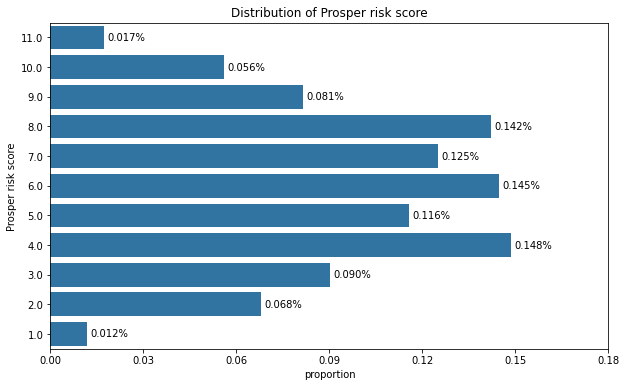

In [51]:
# Compute largest proportion
# Returns the sum of all not-null values in `LoanStatus` column
sum_count = risk_counts.sum()
max_count = risk_counts.max()
max_prop = max_count / sum_count

# Create tick locations and create plot
plt.figure(figsize=(10, 6))
tick_props = np.arange(0, max_prop + 2700 / sum_count , 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sb.color_palette()[0]
ax = sb.countplot(y='ProsperScore', data =loan_df_sub,color = base_color)
plt.xticks(tick_props * sum_count, tick_names)
plt.xlabel('proportion')
for p in ax.patches:
   ax.annotate('{:.3f}%'.format(p.get_width()/sum_count), (p.get_width()+100, p.get_y()+0.5))

plt.title('Distribution of Prosper risk score')
plt.ylabel('Prosper risk score')
plt.show()

- The distribution is approximately symmetric in terms of the intermediate risk score `6`. Its neightboring scores are high ranging between `4` and `8`, whereas scores either larger than `9` or lower than `3` are smaller than `3%`. Indeed, the top 5 scores occupy over `67%` in total.

### Remarks on the distribution(s) of variable(s) of our interest:
- `(BorrowerAPR)`: It is important for both borrowers and Prosper to set a proper amount of annual percentage rates (APRs) for the efficient and reliable repayment of loans as well as for getting high returns. The distribution of APR looks slightly right-skewed, but has a little spike around `0.28` and a sharp peak around `0.35`. We found no particularly odd outlier in the distribution except for that the counts greatly decrese above `0.42`.
- `(LoanStatus)`: For this column, there were fine classifications of `Past Due` depending on the length of periods. Thus, we converted all those values simply into `Past Due`, so that we simplified the distributions. Naturally, approximately a half of loans are `Current`ly ongoing, whereas `33%` are `Completed`. For the rest, `11%` were `Chargedoff`, about `5%` of loans were `Defaulted`, and only `2%` are `Past Due`.
- `(Income Verifiable)`: Over `90%` of borrowers are `verifiable`. It seems natural. No transformation was performed.
- `(Employment Status)`: Over `60%` employee with contracts take loans. The second largest proportion is shared by `Full-time`. We performed no transformation.
- `(Occupation)`: In the distribution, there are the largest and the second largest proportions by `Other` and `Professional`. Apart from those, we picked up only top 10 occupations. They include `Computer Programmer`, `Executive`, and `Teacher` and so on.
- `(Listing Category)`: We converted numertical values into categorical values, which are more interpretable. The distribution shows that the most popular purpose of loans is `Debt Consolidation`, followed by `Home Improvement` and `Business`.
- `(Term)`: Though the values in this column can be converted into categorical values, we did not transform them. The most popular length of loan periods is `36` months (about `77%`).
- `(LoanOriginalAmount)`: In the right-skewed distribution, we found visible 6 spikes around `5K`, `10K`, `15K`, `20K`, `25K`, and `35K` USD.
- `(DebtToIncomeRatio)`: We observed the distribution for this variable with different width of bins. By adjusting the width of bins, we observed a few spikes around `0.35`, `0.41`, `0.45`, and `0.56`. Moreover, the counts drop rapidly right to those spikes.
- `(ProsperRating (Alpha))`: We imposed an ordering on the prosper rating symbols, so that the distribution can be aligned in the order of rating scores. The largest proportion is shared by `C` while it is smaller the sum of proportions of both `A` and `AA`. The distribution looks like a bell shape with the center being `C`, which should be an intermediate score.
- `(ProsperScore)`: We imposed an ordering on numeric rating scores just in case. Top 5 scores are `4`, `6`, `8`, `7`, and `5`. The distribution could be possibly approximated as a bell shape with the center being `6`, which should be an intermediate score.

### Remarks on transformation on the distribution:
- `(StatedMonthlyIncome)`: Since the distribution looks right-skewed whilst it looks like a bell in the log scale.
- `(LoanOriginalAmount)`: The distribution looks right-skewed.
- `(DebtToIncomeRatio)`: The distribution looks right-skewed, so that it looks like a bell shape in the log scale.

## 3. Bivariate Exploration

- In this section, we investigate relationships between pairs of variables in the dataset. 

In [52]:
# We make sure of the data types of variables. 
loan_df_sub.dtypes

LoanStatus                 object
BorrowerAPR               float64
EmploymentStatus           object
Occupation                 object
StatedMonthlyIncome       float64
IncomeVerifiable             bool
DebtToIncomeRatio         float64
LoanOriginalAmount          int64
Term                        int64
ProsperRating (Alpha)    category
ProsperScore             category
ListingCategory            object
dtype: object

In [53]:
# We group classify variables into numeric and categorical ones.
num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginalAmount']
cat_var = ['LoanStatus', 'EmploymentStatus', 'Occupation', 'IncomeVerifiable', 'Term', 'ProsperRating (Alpha)', 'ListingCategory']

### 3.1 Correlation matrix for quantitative variables

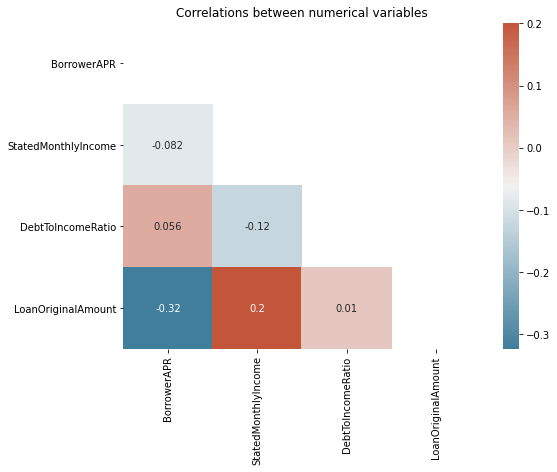

In [54]:
# Compute the correlation matrix for numerical variables
corr = loan_df_sub[num_var].corr()

# Make a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set a custom colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)
# Create the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title("Correlations between numerical variables")
plt.show();

- APR has a negative correlation with `LoanOriginalAmount`. It is natural to think that a financial service company intends to get a high return by increasing an APR for the lower amount of loans assuming that the loan period is fixed. 
- Another negative correlation between APR and `StatedMonthlyIncome` implies that borrowers with lower incomes are required to repay the loan with high APR. It would be understandable that the repayment goes slow with a low speed due to a low income, a financial service company can get a high return by increasing APR. A positive correlation of APR with `DebtIncomeRation` would be a combination of two negative correlations mentioned above. 
- There is a positive correlation between `LoanOriginalAmount` between `StatedMonthlyIncome`. This implies tat the larger amount income borrowers earn, the larger amount of loans they tend to take, which should matche the reason why to take loans.

### 3.2 Relations of Prosper rating with quantitative variables
- Let us investigate the statistics of `BorrwerAPR`, `LoanORiginalAmount` in terms of `Prosper Rating (Alpha)`.

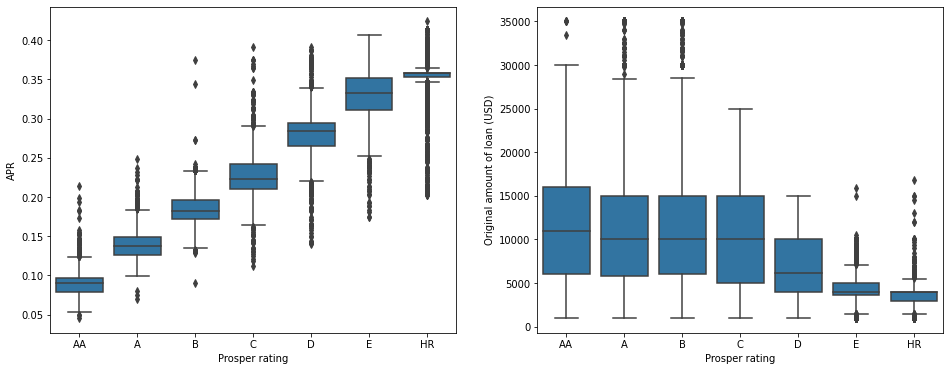

In [59]:
# Draw the two box plots
plt.figure(figsize = ([16, 6]))
plt.subplot(1,2,1)
ax1 = sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.xlabel('Prosper rating')
plt.ylabel('APR')
plt.subplot(1,2,2)
ax2 = sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Prosper rating')
plt.ylabel('Original amount of loan (USD)')
plt.show();

- From the box plot on the left, we see that the boxes (IQR) are located in the lower positions for higher Prosper rating scores.
- From the box plot on the right, the boxes (IQR) for `AA`, `A`, `B`, and `C` look similar while the other boxes are located in lower positions.
- In particular, the box for the lowest score (`HR`) on both plots is the smallest and more points out of the whiskers are manifest.
- Indeed, some spikes around `5K`, `10K`, `15K`, observed in `LoanOriginalAmount` in the previous chapter, correspond to Q1, the median, and Q3 for the rating scores `AA`, `A`, `B`, and `C`.

### 3.3 Relations of Prosper score with quantitative variables
- Let us investigate the statistics of `BorrwerAPR`, `LoanORiginalAmount` in terms of `ProsperScore`.

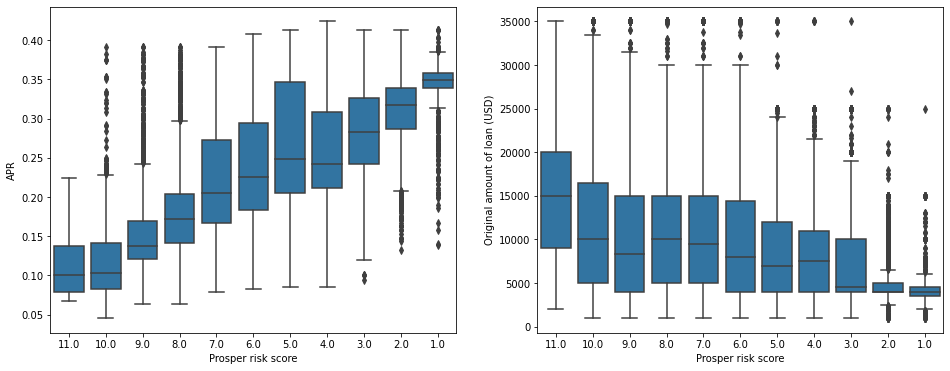

In [61]:
plt.figure(figsize = ([16, 6]))
plt.subplot(1,2,1)
ax1 = sb.boxplot(data=loan_df_sub, x='ProsperScore', y='BorrowerAPR', color=base_color)
plt.xlabel('Prosper risk score')
plt.ylabel('APR')
plt.subplot(1,2,2)
ax2 = sb.boxplot(data=loan_df_sub, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Prosper risk score')
plt.ylabel('Original amount of loan (USD)')
plt.show();

From the two box plots here we obser similar features to those in the box plots for `ProsperRating (Alpha)`.
- On the left, we see that the boxes (IQR) sit in the lower positions for higher Prosper risk scores.
- On the right, the box related to the lowest risk has the largest median and the IQR lies in the highest position.
- On the right, apart from the best risk score, the boxes (IQR) for lower risks (say, scores being between `6.0` and `10.0`) look similar. The other boxes are located in lower positions.
- In particular, the boxes for very low risk scores (`2.0` and `1.0`) on both plots are quite small and many points out of the whiskers are manifesty found.

### 3.4 Relationship between Prosper Rating and Prosper Score

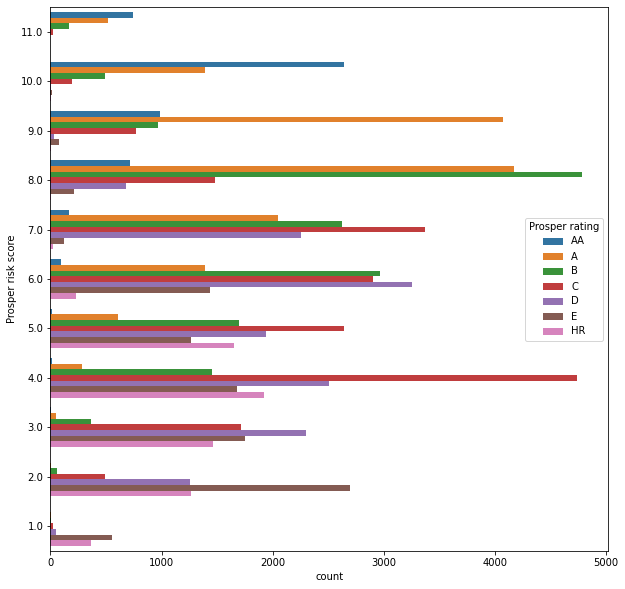

In [62]:
# Create the stacked bar plot
plt.figure(figsize = [10,10])
ax = sb.countplot(data=loan_df_sub, y='ProsperScore', hue='ProsperRating (Alpha)')
ax.legend(title = 'Prosper rating')
plt.ylabel('Prosper risk score');

- This is just a consistency check for two scores; a group of borrowers with high risk scores tend to have the high Prosper Rating. The blue bars are located in the higher ranks. On the other hand, those who have lower risk scores have lower Prosper Rating. Indeed, in the previous two sections for box plots, we found similar features in both cases.

### 3.5 Relationship between Prosper Rating and LoanStatus

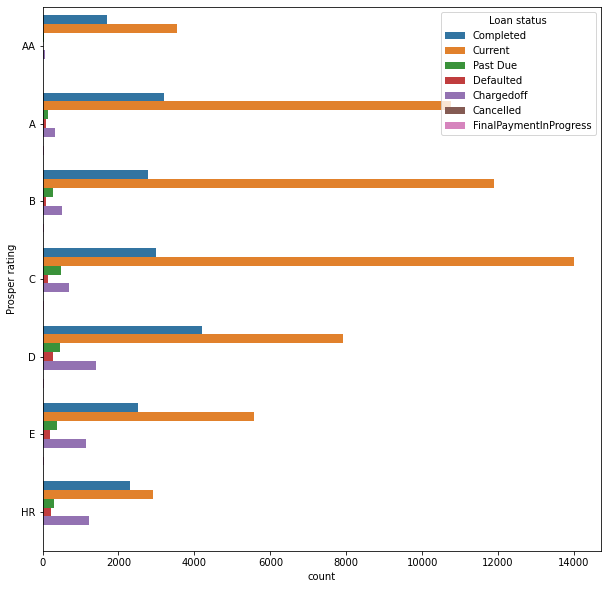

In [63]:
plt.figure(figsize = [10,10])
ax = sb.countplot(data=loan_df_sub, hue='LoanStatus', y='ProsperRating (Alpha)')
ax.legend(title = 'Loan status')
plt.ylabel('Prosper rating');

- Let us focus on unwanted statuses for the loans: `Past Due`, `Defaulted`, and `Chargedoff`. It seems that the higher the rating score becomes, the fewer unwanted cases arise.

### 3.6 Relations of IncomeVerifiable to ProsperRating, ProsperScore, and EmploymentStatus

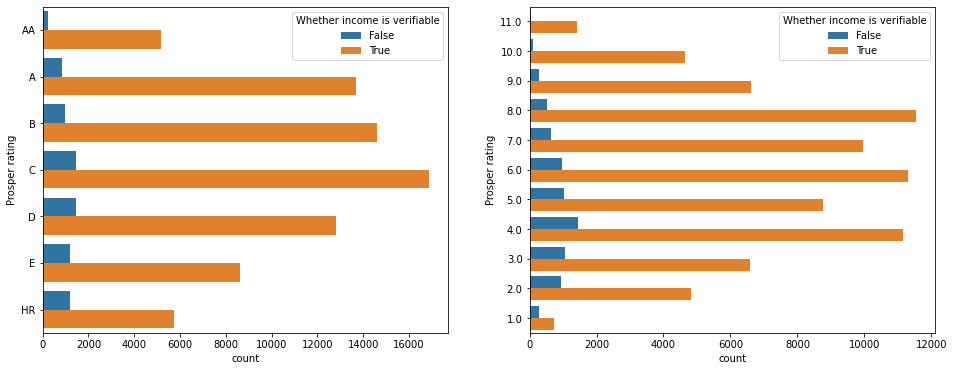

In [64]:
plt.figure(figsize = [16,6])
plt.subplot(1,2,1)
ax1 = sb.countplot(data=loan_df_sub, y='ProsperRating (Alpha)', hue='IncomeVerifiable')
ax1.legend(title ='Whether income is verifiable')
plt.ylabel('Prosper rating');
plt.subplot(1,2,2)
ax = sb.countplot(data=loan_df_sub, y='ProsperScore', hue='IncomeVerifiable')
ax.legend(title ='Whether income is verifiable')
plt.ylabel('Prosper rating');

- It woud be natural to think that (reliable) borrowers with high rating scores should have verifiable incomes. The borrowers with `AA` and `11.0` on the two bar charts have smaller number of `False`, but also smaller number of `True` compared with other classes. It would be more sensible to compare the ratio of `False` to `True` when discussing the distribution of `IncomeVerifiable` across the rating scores. Indeed, starting from the highest rating scores, we have more `False` as we go down to lower ratin scores to the intermediate ones (`C` and `4.0`). However, below those intermediate values, the number of `False` tends to decrease in both bar charts.

### 3.7 Relation between EmploymentStatus and IncomeVerifiable

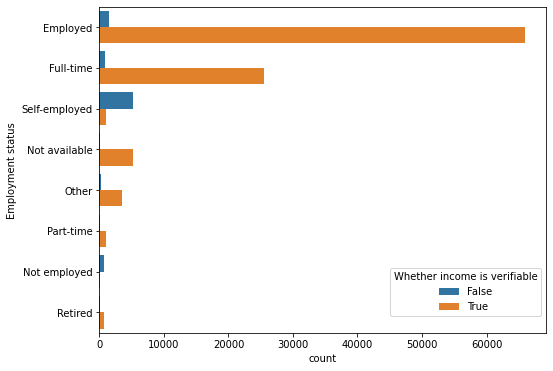

In [65]:
plt.figure(figsize=(8,6))
order = loan_df_sub.EmploymentStatus.value_counts().index
ax = sb.countplot(data=loan_df_sub, y='EmploymentStatus', hue='IncomeVerifiable', order=order)
ax.legend(bbox_to_anchor=(0.99, 0.2), borderaxespad=0, title = "Whether income is verifiable")
plt.ylabel('Employment status')
plt.show();

- Note that there is a larger number of `False` for the incomes of `Self-employed` than `True`. This tendency also applies to `Not employed`. This means that the existence of employers is important for verifying the incomes.

### 3.8 Relation between APR and Term

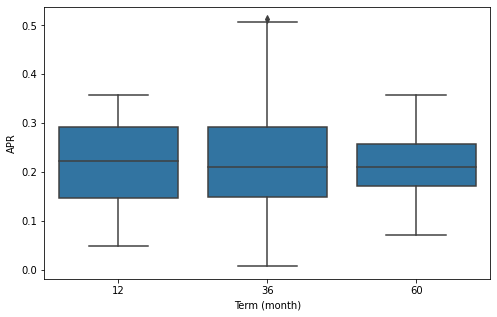

In [66]:
plt.figure(figsize = ([8, 5]))
sb.boxplot(data=loan_df_sub, x='Term', y='BorrowerAPR', color=base_color)
plt.xlabel('Term (month)')
plt.ylabel('APR')
plt.show()

- The median of each box is almost the same (a little larger than `0.2`).
- The IQRs for `12` and `36` months are almost the same. The box for `60` months is narrower compared with them.
- Note that the plot for `36` months have longer whiskers than the others.

### 3.9 Relation between LoanOriginalAmount and Term

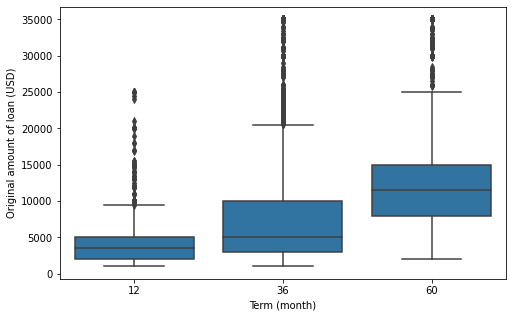

In [68]:
plt.figure(figsize = ([8, 5]))
sb.boxplot(data=loan_df_sub, x='Term', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Term (month)')
plt.ylabel('Original amount of loan (USD)')
plt.show();

- Clearly, the IQR gets wider as the duration of loans gets longer. Correspondingly, the median gets higher.

### 3.10 Relation between BorrowerAPR and IncomeVerifiable

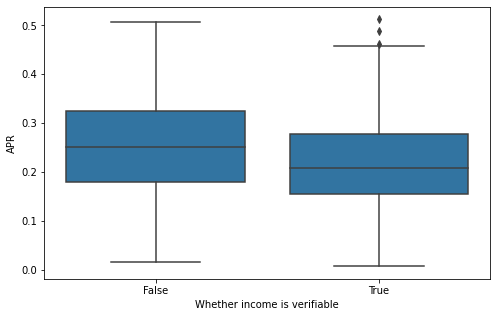

In [69]:
plt.figure(figsize = ([8, 5]))
sb.boxplot(data=loan_df_sub, x='IncomeVerifiable', y='BorrowerAPR', color=base_color)
plt.xlabel('Whether income is verifiable')
plt.ylabel('APR')
plt.show();

- Though for `False` the IQR is wider and the median is larger than for `True`, we see no big difference of APRs in terms of whether the income is verifiable.

### Some relationships in terms of `BorrowerAPR`.
- (vs `LoanOriginalAmount`): APR is negatively correlated with `LoanOriginalAmount`. One could think that a financial service company intends to get a high return by increasing an APR for the lower amount of loans, provided that the loan period is fixed.
- (vs `StatedMonthlyIncome`): APR has also a negative correlation with `StatedMonthlyIncome`. This would imply that borrowers with lower incomes are required to repay the loan with high APR. One could think that since the repayment would go slow with a low speed due to a low income, a financial service company could get a high return by increasing APR.
- (vs `DebtIncomeRation`): On the other hand, the APR is positively correlated with `DebtIncomeRation`. This would be a combination of two negative correlations mentioned above.
- (vs `ProsperRating (Alpha)`): According to the box plot, the boxes (IQR) are located in the lower ranges of APRs for higher Prosper rating scores. For the lowest score (`HR`), the box is the smallest and more points out of the whiskers are manifest.
- (vs `ProsperScore`): we see that the boxes (IQR) sit in the lower ranges of APRs as Prosper risk scores get higher. For very low risk scores (`2.0` and `1.0`), the boxes are quite small and more points out of the whiskers are manifesty found.
- (vs `Term`): While the median of each box is a big larger than 0.2, the box for `60` months is narrower compared with the others. The box for `36` months have longer whiskers than the others.

### Some interesting relationships with respect to the other features.
- (`LoanOriginalAmount` vs `StatedMonthlyIncome`): These variables are positively correlated. This would imply that the larger amount income borrowers would earn, the larger amount of loans they would tend to take, which should match the reason why to take loans.
- (`LoanOriginalAmount` vs '`ProsperRating (Alpha)`): From the box plot, the boxes (IQR) for `AA`, `A`, `B`, and `C` look similar while the other boxes are located in lower ranges of original loans. In particular, the box for the lowest score (`HR`) is the smallest and more points out of the whiskers are manifest.
- (`LoanOriginalAmount` vs '`ProsperScore`): The box related to the lowest risk (`11.0`) has the largest median and the IQR lies in the higher ranges of original loans than any other. Apart from this best risk score, the boxes (IQR) for lower risks (say, scores being between `6.0` and `10.0`) look similar. The other boxes are located in lower ranges. In particular, the boxes for very low scores (`2.0` and `1.0`) are much smaller than any other, and more points out of the whiskers are visible.
- (`EmploymentStatus` vs `IncomeVerifiable`): There is a larger number of `False` for the incomes of `Self-employed` than `True`. This tendency is also observed for `Not employed`. The existence of employers seems important for verifying the incomes.

## 4. Multivariate Exploration

This section focuses on three variables on the same footing to investigate our dataset even further.

### 4.1 BorrowerAPR vs DebtToIncomeRatio vs ProsperRating

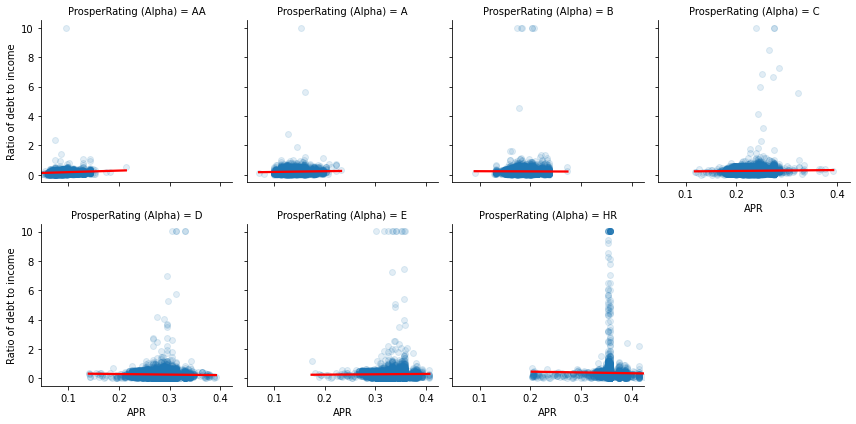

In [71]:
# Create a FacetGrid and use regplot
g = sb.FacetGrid(data=loan_df_sub, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'BorrowerAPR', 'DebtToIncomeRatio', scatter_kws=dict(alpha=1/8), line_kws=dict(color='red'))
g.set_xlabels('APR')
g.set_ylabels('Ratio of debt to income')
plt.show();

- In our bivariate exploration, the `BorrowerAPR` was considered as positively correlated with `DebtToIncomeRatio`. This trend is less manifest when observing these two variables in terms of each class of Prosper ratings. One could understand that when ignoring the difference of ratinf score, some irregular points for the Prosper Rating scores `E` and `HR` would cause a positive slope of the fitting line above. Thus, the correlation would become positive.

### 4.2 BorrowerAPR vs LoanOriginalAmount vs ProsperRating

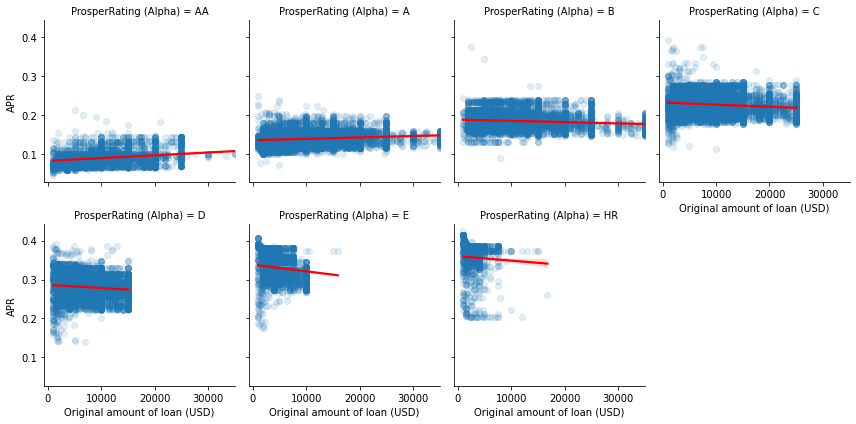

In [72]:
# Create a FacetGrid and use regplot
g = sb.FacetGrid(data=loan_df_sub, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws=dict(alpha=1/8), line_kws=dict(color='red'))
g.set_xlabels('Original amount of loan (USD)')
g.set_ylabels('APR')
plt.show();

- The `BorrowerAPR` had simply a negative correlation with `LoanOriginalAmount` in the previous chapter. However, for the rating scores `AA` and `A` we still find positive correlations whilst for the other rating scores the correlations are negative.

### 4.3 BorrowerAPR vs ProsperRating vs Term

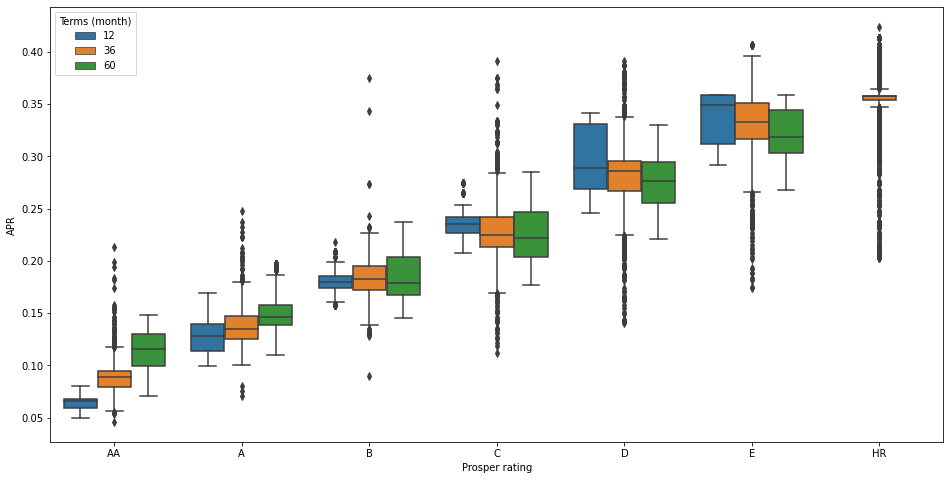

In [74]:
# Create a boxplot with colors
plt.figure(figsize = [16, 8])
sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term')
plt.xlabel('Prosper rating')
plt.ylabel('APR')
plt.legend(title='Terms (month)');

- As the rating score gets lower, a group of three boxes moves above and an APR gets higher. 
- In the previous chapter, without `ProsperRating`, the median of APR did not change much depending on the length of laon terms. Here, for `AA` and `A`, the median for `12` months is smaller than that for `36` months and the latter is smaller than that for `60` months. For `C`, `D`, and `E`, on the other hand, we see that the box for `12` months is the largest median, the box for `36` months has the second largest.
- For the `HR`, we have no box for `12` months or `60` months.
- The lower scores `D` and `E` have the larger boxes for `12` months than the higher scores.

### 4.4 BorrowerAPR vs ProsperScore vs Term

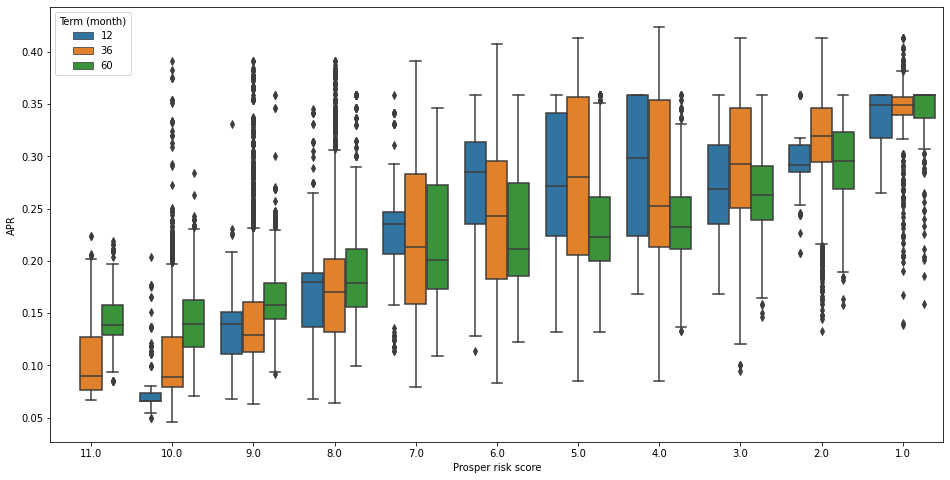

In [76]:
# Create a boxplot with colors
plt.figure(figsize = [16, 8])
sb.boxplot(data=loan_df_sub, x='ProsperScore', y='BorrowerAPR', hue='Term')
plt.xlabel('Prosper risk score')
plt.ylabel('APR')
plt.legend(title='Term (month)');

- For higher Prosper scores, say larger than `6.0`, the boxes for `12` months are relatively small. In particular, there is no `12` months box in `11.0`.
- As seen in the previous section, as the rating scores become lower, the medians and IQRs for APRs tend to get higher: the boxes move to upper positions as the scores decrease.

### 4.5 BorrowerAPR vs ProsperScore vs IncomeVerifiable

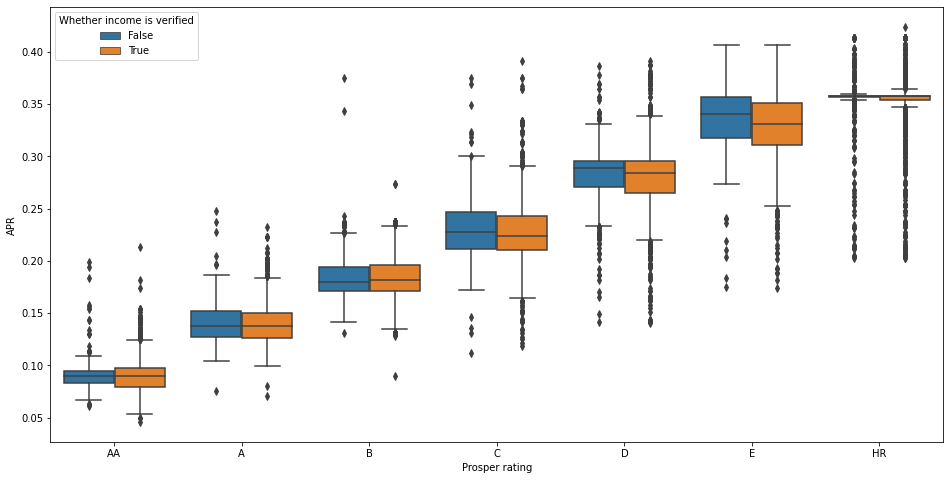

In [77]:
# Create a boxplot with colors
plt.figure(figsize = (16, 8))
sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='IncomeVerifiable')
plt.xlabel('Prosper rating')
plt.ylabel('APR')
plt.legend(title='Whether income is verified');

- We see no crucial difference for the distributions of boxes for each class of rating scores. 
- For the lowest score `HR`, the boxes are shrunk and lots of points are found out of whiskers.
- We observed a similar pattern by replacing `ProsperRating (Alpha)` with `ProsperScore`.

### 4.6 LoanOriginalAmount vs ProsperRating vs Term

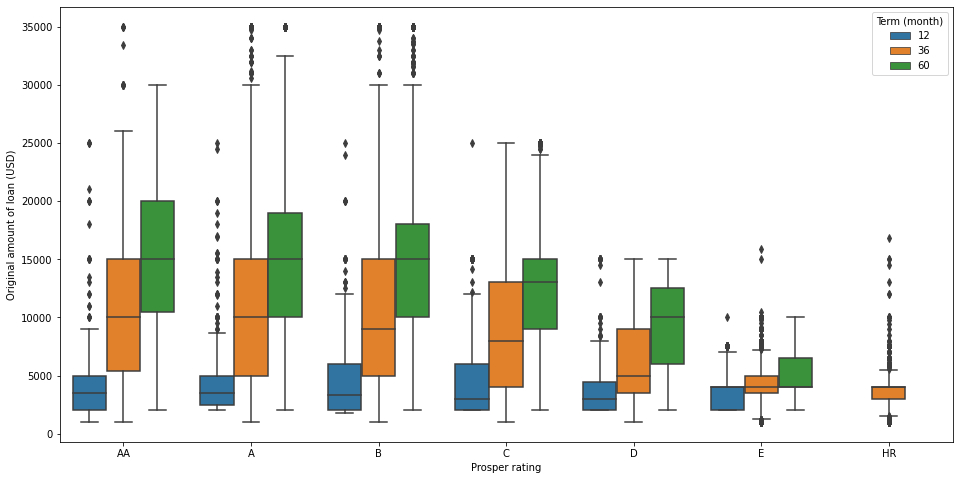

In [79]:
# Create a boxplot with colors
plt.figure(figsize = (16, 8))
sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='Term')
plt.xlabel('Prosper rating')
plt.ylabel('Original amount of loan (USD)')
plt.legend(title='Term (month)');

- In the previous part, the boxes for `AA`, `A`, `B`, and `C` look similar while the other boxes are located in lower positions. Here a group of boxes tend to take smaller amounts of loans as the score gets lower. The lower the score becomes, the median and the IQRs of boxes, for `36` and `60` months in particular, become smaller. On the other hand, the median and the IQR for `12` months do not change much across the scores. The exception is that for `HR`, there is no box for `12` and `60` months.
- Let us focus on good scores `AA`, `A`, , and `B`, for example. Their boxex `36` months take the Q1 around `5k`, the median around `10k`, and the Q3 around `15k`. Moreover, the boxes `60` months take the Q1 around `10k`, the median around `15k`, and the Q3 around `20k`. They match the spikes observed in the part of univariate exploration.

### Summary of the relationships of `BorrowerAPR` with two features
- (vs `DebtToIncomeRatio` vs `ProsperRating`): The `BorrowerAPR` was considered as positively correlated with `DebtToIncomeRatio` in the previous part. However, this trend is less manifest when observing these two features by varying Prosper ratings. When ignoring the difference of ratinf score, some irregular points for the Prosper Rating scores `E` and `HR` might cause a positive slope of the fitting line above, so that the correlation might have become positive.
- (vs `LoanOriginalAmount` vs `ProsperRating`): The `BorrowerAPR` had simply a negative correlation with `LoanOriginalAmount` in the previous part. However, for the rating scores `AA` and `A` we still find positive correlations, but for the other rating scores the correlations turn out to be negative.
- (vs `ProsperRating` vs `Term`): As the rating score gets lower, a group of three boxes moves above and an APR gets higher. 
- (vs `ProsperRating` vs `Term`): In the previous part, without `ProsperRating`, the median of APR did not change much depending on the length of laon periods. However, for `AA` and `A`, the median for `12` months is smaller than that for `36` months and the latter is smaller than that for `60` months. For the lower scores `C`, `D`, and `E`, the box for `12` months is the largest median, and the box for `36` months has the second largest.
- (`ProsperScore` vs `IncomeVerifiable`): We see no crucial difference for the distributions of boxes for each class of rating scores. 

### Some interesting observations between other features
- (`LoanOriginalAmount` vs `ProsperScore` vs `Term`): Compared with the previous observation, where the boxes for `AA`, `A`, `B`, and `C` look similar while the other boxes are located in lower positions, a group of boxes tend to take smaller amounts of loans as the score gets lower. In particular, for the lower the scores, the median and the IQRs of boxes for `36` and `60` months become smaller. On the other hand, the median and the IQR for `12` months do not change much across the scores. 
- (`LoanOriginalAmount` vs `ProsperScore` vs `Term`): As for `AA`, `A`, , and `B`, their boxex `36` months take the Q1 around `5k`, the median around `10k`, and the Q3 around `15k`. Furthermore, the boxes `60` months take the Q1 around `10k`, the median around `15k`, and the Q3 around `20k`. Indeed, they match the unusual spikes found in the part of univariate exploration.

## Summary of analysis and findings with emphasis on `BorrowerAPR`
Among 81 variables, we chose 12 features. They include the basic information on the loans, such as `BorrowerAPR`, `LoanOriginalAmount`, and `Term` and the borrowers' data, such as `StatedMonthlyIncome`, `ProsperRating (Alpha)`, and `Occupation`. In particular, `BorrowerAPR` was of our great interest, since a proper amount of APRs should be essential not only in order to make the repayment of loans, but also in order for the Prosper to get returns as efficiently as possible. Moreover, we were interested how this variable was correlated with the amount of loans and the length of loan periods, as well as the customer's rating scores and so on.

First we explored each variable to observe the statistics, the distributions, and unusual behaviors in various plots. Then we focused on pairs of variables and carried out various explorations depending on the data types of two variables. As a result, the `BorrowerAPR` seemed to be negatively correlated with `LoanOriginalAmount` and `StatedMonthlyIncome` whilst positively correlated with `DebtToIncomeRatio`. Moreover, the major range of APR values (i.e. IQR) is negatively correlated with both `ProsperRating (Alpha)` and `ProsperScore`.

From the perspective of multivariate analysis, we found more details of correlations of APRs with other features. For each class of `ProsperRating (Alpha)`, the positive correlation of APRs with `DebtToIncomeRatio` gets less manifest. Moreover, the correlation between APRs and `LoanOriginalAmount` changes varying Prosper rating scores. Whilst the correlation was positive for high scores (`AA` and `A`), we found negative relationships for the rest of scores. According to the fitting lines, the negative correlation got slightly stronger as the score gets lower.

Also, with Prosper rating scores varied, we found different behaviors of statistics of APRs in terms of `Term` in the box plot. Unlike in the bivariate analysis, the range of APR values got higher as the Prosper scores got lower. In addition, the features of boxes, such as the values of Q2 and the IQRs were also different depending on the length of terms for each rating. For example, Q2 got larger as the duration of loan periods got longer for high scores (`AA` and `A`), but this relation was reversed for low scores.

## Remarks on relationships between other features
Apart from `BorrowerAPR`, we investigated a relationship between `LoanOriginalAmount`, `ProsperRating (Alpha)`, and `Term`. When comparing only `LoanOriginalAmount` and `Term`, the boxes for `AA`, `A`, `B`, and `C` looked similar while the other boxes were located in lower positions, taking lower APRs. However, for each class of rating scores, the statistics of APRs became different depending on the length of loan periods. As the score got lower, the median and the IQRs of boxes for `36` and `60` months got shunk. On the other hand, the median and the IQR for `12` months did not change much across the scores.
More interestingly, as for higher scores `AA`, `A`, and `B`, their boxes `36` months took the Q1 around `5K`, the median around `10K`, and the Q3 around `15K`. In addition, the boxes `60` months took the Q1 around `10K`, the median around `15K`, and the Q3 around `20K`. These characteristic values matched the loan values, where unusual spikes were found in the part of univariate exploration.